In [1]:
#导入需要的库
import os
import shutil
from PIL import Image
import pandas as pd
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from torchvision.models import resnet34

## 处理异常图片

In [2]:
dir_lit = os.listdir('d:\\desk\\pal\\')
for list in dir_lit:
    img0 = os.listdir('d:\\desk\\pal\\'+list+'\\')
    for img1 in img0:
        img_path=os.path.join('d:\\desk\\pal\\'+list+'\\',img1)
        img=Image.open(img_path)
        if img.mode != 'RGB':
            img = img.convert('RGB')
            img.save(img_path)
            print(img_path)

d:\desk\pal\class_1\012.png
d:\desk\pal\class_1\014.png
d:\desk\pal\class_1\016.png
d:\desk\pal\class_1\018.png
d:\desk\pal\class_1\020.png
d:\desk\pal\class_2\013.png
d:\desk\pal\class_2\015.png
d:\desk\pal\class_2\017.png
d:\desk\pal\class_2\019.png
d:\desk\pal\class_2\021.png
d:\desk\pal\class_2\023.png
d:\desk\pal\class_3\030.png
d:\desk\pal\class_3\031.png
d:\desk\pal\class_3\032.png
d:\desk\pal\class_3\033.png
d:\desk\pal\class_3\034.png
d:\desk\pal\class_4\034.png
d:\desk\pal\class_4\035.png
d:\desk\pal\class_4\036.png
d:\desk\pal\class_6\023.png
d:\desk\pal\class_6\024.png
d:\desk\pal\class_6\025.png
d:\desk\pal\class_6\026.png
d:\desk\pal\class_6\027.png
d:\desk\pal\class_7\027.png
d:\desk\pal\class_7\028.png
d:\desk\pal\class_7\029.png
d:\desk\pal\class_7\030.png
d:\desk\pal\class_7\031.png
d:\desk\pal\class_8\030.png
d:\desk\pal\class_8\031.png
d:\desk\pal\class_8\032.png
d:\desk\pal\class_8\033.png
d:\desk\pal\class_8\034.png
d:\desk\pal\class_9\022.png
d:\desk\pal\class_9\

In [ ]:
#数据整理成paddlex 需要的数据格式
#创建12个文件夹分别对应标签
path='./work/MyDataset/'
for i in range(12):
    if not os.path.exists(path+str(i)):
        os.mkdir(path+str(i))
    else:
        continue
#读取每一行
with open(f'./work/list.txt','r')as f:
    img_path=f.readlines()
for img in img_path:
    print(img)
    img_src= img.split('\t')[0]
    rel_src= img_src.split('cat_12_train/')[1]
    img_label = img.split('\t')[1]
    img_label = img_label.split('\n')[0]
    print(img_src)
    print(rel_src)
    print(img_label)
    # os.system(f'cp ./work/{img_src} ./work/MyDataset/{img_label}/{rel_src}')
    shutil.copy(f'./work/{img_src}',f'./work/MyDataset/{img_label}/{rel_src}')
    break
print('图片处理完毕')

In [5]:
from torch.utils.data import random_split

# Your code using random_split


# 定义数据增强变换
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # 随机水平翻转
    transforms.RandomRotation(15),      # 随机旋转
    transforms.Resize((224, 224)),      # 调整大小到指定尺寸
    transforms.ColorJitter(brightness=0.2, contrast=0.2),  # 随机调整亮度和对比度
    transforms.ToTensor(),              # 转换为张量
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # 标准化
])


# 加载数据集
dataset = torchvision.datasets.ImageFolder(root='D:\\desk\\pal', transform=transform)

train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])


# 创建数据加载器
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=False)



In [6]:
# 定义ResNet34模型
model = resnet34(pretrained=True)
num_classes = 10  # 标签类别数
model.fc = nn.Linear(model.fc.in_features, num_classes)  # 修改最后一层全连接层

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 训练模型
for epoch in range(20):
    model.train()
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# 在验证集上评估模型
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in val_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Validation accuracy: {accuracy:.2f}%')


C:\Users\Pockey\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Pockey\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to C:\Users\Pockey/.cache\torch\hub\checkpoints\resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

Validation accuracy: 71.88%


In [7]:
torch.save(model, 'val_70_train20.pth')
print('保存成功')

Epoch 1, Loss: 1.3233382888138294
Epoch 2, Loss: 2.983240080997348
Epoch 3, Loss: 1.979932278394699
Epoch 4, Loss: 1.8480831235647202
Epoch 5, Loss: 3.3356261998414993
Epoch 6, Loss: 2.8626391626894474
Epoch 7, Loss: 1.1783872228115797
Epoch 8, Loss: 1.3884683717042208
Epoch 9, Loss: 1.3926187548786402
Epoch 10, Loss: 0.9922442696988583
Validation accuracy after 10 epochs: 84.38%
F1 Score after 10 epochs: 0.83
AUC after 10 epochs: 0.90
Epoch 11, Loss: 0.9545264076441526
Epoch 12, Loss: 0.5236201696097851
Epoch 13, Loss: 0.16351494565606117
Epoch 14, Loss: 0.316410148749128
Epoch 15, Loss: 0.3064652399625629
Epoch 16, Loss: 0.20352088357321918
Epoch 17, Loss: 0.22259149060118943
Epoch 18, Loss: 0.12470217619556934
Epoch 19, Loss: 0.30234978068619967
Epoch 20, Loss: 0.06444936501793563
Validation accuracy after 20 epochs: 81.25%
F1 Score after 20 epochs: 0.79
AUC after 20 epochs: 0.89


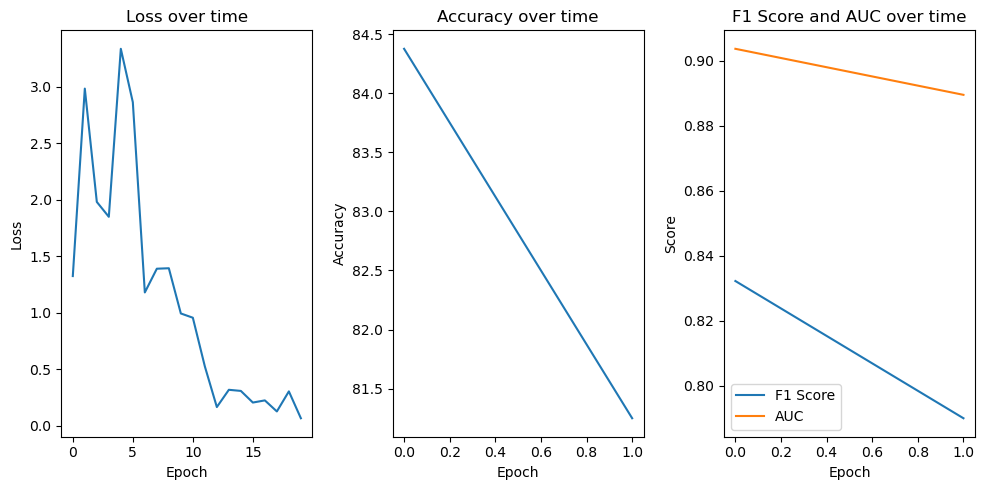

Confusion Matrix:


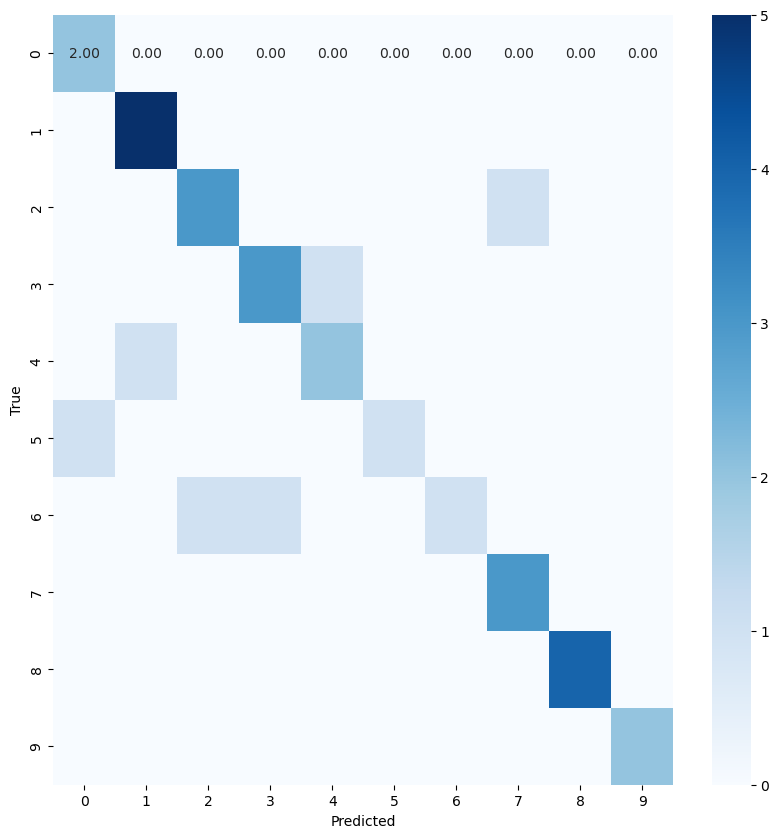

In [10]:
import torch
import torchvision.models as models
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import label_binarize
import seaborn as sns


device = torch.device('cuda：0')

# 初始化一个模型
model = torch.load('val_70_train20.pth')
model = model.to(device)

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 用于保存损失和准确率的列表
losses = []
accuracies = []
f1_scores = []
auc_scores = []

# 训练模型
for epoch in range(20):  # 训练20次
    model.train()
    loss_now = 0
    for images, labels in train_loader:
        
        images = images.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss_now += loss.item()
        loss.backward()
        optimizer.step()
        
    print(f'Epoch {epoch+1}, Loss: {loss_now}')  # 打印本次的损失
    losses.append(loss_now)  # 保存本次的损失

    # 每10次训练进行一次评估并保存模型
    if (epoch + 1) % 10 == 0:
        model.eval()
        correct = 0
        total = 0
        all_labels = []
        all_predictions = []
        with torch.no_grad():
            for images, labels in val_loader:

                images = images.to(device)
                labels = labels.to(device)
            
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                all_labels.extend(labels.numpy())
                all_predictions.extend(predicted.numpy())

        accuracy = 100 * correct / total
        print(f'Validation accuracy after {epoch+1} epochs: {accuracy:.2f}%')
        accuracies.append(accuracy)  # 保存本次的准确率
        
        # 计算F1分数和AUC
        f1 = f1_score(all_labels, all_predictions, average='macro')
        f1_scores.append(f1)
        print(f'F1 Score after {epoch+1} epochs: {f1:.2f}')
        
        # 对标签进行二值化编码
        n_classes = len(set(all_labels))
        all_labels_bin = label_binarize(all_labels, classes=[i for i in range(n_classes)])
        all_predictions_bin = label_binarize(all_predictions, classes=[i for i in range(n_classes)])
        
        auc = roc_auc_score(all_labels_bin, all_predictions_bin, average='macro', multi_class='ovr')
        auc_scores.append(auc)
        print(f'AUC after {epoch+1} epochs: {auc:.2f}')
        
        # 保存模型
        torch.save(model, f'model_after_{epoch+1}_epochs.pth')

# 绘制损失图像
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.plot(losses)
plt.title('Loss over time')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# 绘制准确率图像
plt.subplot(1, 3, 2)
plt.plot(accuracies)
plt.title('Accuracy over time')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# 绘制F1分数和AUC图像
plt.subplot(1, 3, 3)
plt.plot(f1_scores, label='F1 Score')
plt.plot(auc_scores, label='AUC')
plt.title('F1 Score and AUC over time')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()

plt.tight_layout()
plt.show()

# 计算并打印混淆矩阵
conf_mat = confusion_matrix(all_labels, all_predictions)
print('Confusion Matrix:')
plt.figure(figsize=(10, 10))
sns.heatmap(conf_mat, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
